(200, 2)


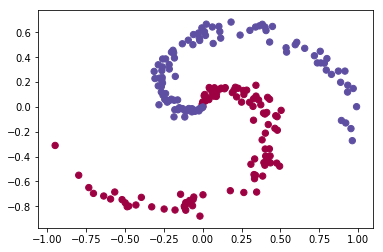

In [109]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
yc = np.zeros((N*K,2))
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    if j == 0:
        yc[ix] = np.matrix([[1, 0]])
    else:
        yc[ix] = np.matrix([[0, 1]])
# lets visualize the data:
print(yc.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [118]:
h = 100
np.random.seed(1)

W0 = np.random.randn(D, h)
W1 = np.random.randn(h, K)
b0 = np.zeros((1, h))
b1 = np.zeros((1, K))
learning_rate = 1e-5

def relu(x):
    return np.maximum(0.0,x)

def relu_derivative(output):
    output[output <= 0] = 0
    output[output>0] = 1
    return output

def sigmoid(x):
     return 1/ (1 + np.exp(-x))

def sigmoid_derivative(output):
    """computes the local derivative aka the derivative of what came out of that layer"""
    return output * (1-output)


for i in range(5000):
    
    mb0 = np.dot(X, W0) 
    a0 = relu(mb0) 
    
    mb1 = np.dot( a0, W1) 
    a1 = mb1
    
    loss = np.sum((a1 - yc)**2)
    
    if i % 500 == 0:
        print("iteration %d: loss %f" % (i, loss))
    
    dCda1 = 2 * (a1 - yc)
    dm1dW1 = a0 
    dm1da0 = W1
    
    da0dmb0 = relu_derivative(a0) 
    dm0dW0 = X
    

    tmp1 = np.dot(dCda1, dm1da0.T)
    tmp2 = da0dmb0 * tmp1
    
    dCdW0 = np.dot(dm0dW0.T, tmp2)
    dCdW1 = np.dot(a0.T, dCda1)
    
    
    W1 -= learning_rate * dCdW1
    W0 -= learning_rate * dCdW0

#     b0 -= learning_rate * dCdb0
#     b1 -= learning_rate * dCdb1

    
# evaluate training set accuracy
hidden_layer = np.maximum(0,np.dot(X, W0))
scores = np.dot(hidden_layer, W1)
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

iteration 0: loss 5227.863755
iteration 500: loss 86.981267
iteration 1000: loss 82.751364
iteration 1500: loss 83.698872
iteration 2000: loss 85.340862
iteration 2500: loss 86.518242
iteration 3000: loss 87.423930
iteration 3500: loss 87.579972
iteration 4000: loss 87.865353
iteration 4500: loss 86.965761
training accuracy: 0.78


(-1.8785957905963018, 1.6814042094037014)

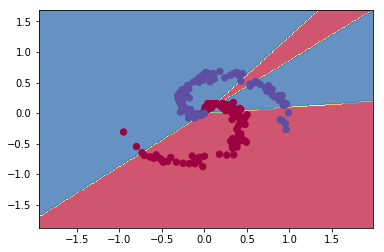

In [119]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W0) ), W1 )
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')